In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

plt.rcParams["figure.figsize"]=(10,6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: '%.2f'  %x)

pd.options.display.max_rows=50
pd.options.display.max_columns=100

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")

In [91]:
df0= pd.read_csv("Sports Supplements.csv")
df = df0.copy()

In [92]:
df.shape

(96, 46)

In [93]:
df.size

4416

In [94]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 46 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   supplement                                                                                                     96 non-null     object 
 1   alt name                                                                                                       51 non-null     object 
 2   evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong   96 non-null     float64
 3   Claimed improved aspect of fitness                                                                             96 non-null     object 
 4   fitness category                                    

,"evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong",popularity,number of studies examined,number of citations,efficacy,exclude,Unnamed: 13,Cochrane systematic review,Other International review board or metastudy,no. of studies in Cochrane metastudy,No. of individual studies / reviews,Unnamed: 24,Link to individual study.20
count,96.00,96.00,96.00,96.00,0.00,0.00,0.00,96.00,96.00,96.00,96.00,0.00,0.00
mean,1.58,3751.59,3.46,777.34,NaN,NaN,NaN,0.01,0.14,0.16,3.34,NaN,NaN
std,1.67,4721.99,3.61,1255.88,NaN,NaN,NaN,0.10,0.49,1.53,3.65,NaN,NaN
min,0.00,0.00,1.00,4.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN
25%,0.00,809.00,1.00,63.75,NaN,NaN,NaN,0.00,0.00,0.00,1.00,NaN,NaN
50%,1.00,1875.00,2.00,319.50,NaN,NaN,NaN,0.00,0.00,0.00,2.00,NaN,NaN
75%,2.25,5490.00,4.00,660.00,NaN,NaN,NaN,0.00,0.00,0.00,4.00,NaN,NaN
max,6.00,24100.00,19.00,5090.00,NaN,NaN,NaN,1.00,3.00,15.00,19.00,NaN,NaN


In [95]:
new_column_names = {
    'supplement': "Supplement", 
    'alt name': "Alternative_Name",
    'evidence level - score. 0 = no evidence, 1,2 = slight, 3 = conflicting , 4 = promising, 5 = good, 6 = strong ': "Evidence_Level",
    'Claimed improved aspect of fitness': "Improvement",
    'fitness category':"Category",
    'sport or exercise type tested':"Exercise_Type", 
    'OTW':"OTW", 
    'popularity':"Popularity",
    'number of studies examined':"Sample_Size",
    'number of citations':"Citation", 
    'efficacy':"Drop",
    'notes':"Notes", 
    'exclude':"Drop", 
    'Unnamed: 13':"Drop",
    'Cochrane systematic review':"Review",
       'Other International review board or metastudy':"Other_Metastudy",
       'no. of studies in Cochrane metastudy':"Metastudy_Number", 
       'no. of studies in metastudy':"Metastudy_Size",
       'year(s) of metastudy':"Year", 
       'No. of individual studies / reviews':"Ind_Study_Reviews",
       'N positive studies / trials':"Number_Positive", 
       '% positive studies/ trials':"Percentage_Positive",
       'main study source':"Main_Study_Source", 'Link to main individual study':"Drop", 'Unnamed: 24':"Drop",
       'Link to individual study':"Drop", 'Link to individual study.1':"Drop",
       'Link to individual study.2':"Drop", 'Link to individual study.3':"Drop",
       'Link to individual study.4':"Drop", 'Link to individual study.5':"Drop",
       'Link to individual study.6':"Drop", 'Link to individual study.7':"Drop",
       'Link to individual study.8':"Drop", 'Link to individual study.9':"Drop",
       'Link to individual study.10':"Drop", 'Link to individual study.11':"Drop",
       'Link to individual study.12':"Drop", 'Link to individual study.13':"Drop",
       'Link to individual study.14':"Drop", 'Link to individual study.15':"Drop",
       'Link to individual study.16':"Drop", 'Link to individual study.17':"Drop",
       'Link to individual study.18':"Drop", 'Link to individual study.19':"Drop",
       'Link to individual study.20':"Drop"
                   }
            
df.rename(columns=new_column_names, inplace=True)

In [96]:
df.drop('Drop', axis=1, inplace=True)
df.columns

Index(['Supplement', 'Alternative_Name', 'Evidence_Level', 'Improvement',
       'Category', 'Exercise_Type', 'OTW', 'Popularity', 'Sample_Size',
       'Citation', 'Notes', 'Review', 'Other_Metastudy', 'Metastudy_Number',
       'Metastudy_Size', 'Year', 'Ind_Study_Reviews', 'Number_Positive',
       'Percentage_Positive', 'Main_Study_Source'],
      dtype='object')

In [97]:
{'strength–power':'S', 'fat burning–muscle building, aerobic–endurance': 'PE',
       'anaerobic–high-intensity':'P', 'aerobic–endurance':'E',
       'aerobic–endurance, strength–power':'ES', 'general fitness':'S',
       'fat burning–muscle building':'P', 'recovery–injury prevention':'P',
       'aerobic–endurance, anaerobic–high-intensity':'EP',
       'recovery–injury prevention, sports psychology':'P',
       'strength–power, anaerobic–high-intensity':'SP', 'sports psychology':'P',
       'fat burning–muscle building, general fitness':'PS',
       'fat burning–muscle building, strength–power, aerobic–endurance':'PSE',
       'fat burning–muscle building, aerobic–endurance, anaerobic–high-intensity, strength–power':'PES',
       'general fitness, strength–power, fat burning–muscle building':'SP',
       'strength–power, fat burning–muscle building':'SP',
       'aerobic–endurance, anaerobic-high-intensity':'PE',
       'fat burning–muscle building, recovery–injury prevention':'P',
       'fat burning–muscle building, strength–power':'PS',
       'aerobic–endurance, fat burning–muscle building, general fitness':'EPS',
       'recovery–injury prevention, fat burning–muscle building':'P',
       'aerobic–endurance, fat burning–muscle building':'PE',
       'strength–power, fat burning-muscle building':'PS',
       'aerobic–endurance, sports psychology':'PS',
       'aerobic–endurance, strength–power, general fitness':'ES',
       'strength–power, recovery–injury prevention ':'SP'}

{'strength–power': 'S',
 'fat burning–muscle building, aerobic–endurance': 'PE',
 'anaerobic–high-intensity': 'P',
 'aerobic–endurance': 'E',
 'aerobic–endurance, strength–power': 'ES',
 'general fitness': 'S',
 'fat burning–muscle building': 'P',
 'recovery–injury prevention': 'P',
 'aerobic–endurance, anaerobic–high-intensity': 'EP',
 'recovery–injury prevention, sports psychology': 'P',
 'strength–power, anaerobic–high-intensity': 'SP',
 'sports psychology': 'P',
 'fat burning–muscle building, general fitness': 'PS',
 'fat burning–muscle building, strength–power, aerobic–endurance': 'PSE',
 'fat burning–muscle building, aerobic–endurance, anaerobic–high-intensity, strength–power': 'PES',
 'general fitness, strength–power, fat burning–muscle building': 'SP',
 'strength–power, fat burning–muscle building': 'SP',
 'aerobic–endurance, anaerobic-high-intensity': 'PE',
 'fat burning–muscle building, recovery–injury prevention': 'P',
 'fat burning–muscle building, strength–power': 'PS',
 '

In [98]:
df.replace({'strength–power':'S', 'fat burning–muscle building, aerobic–endurance': 'PE',
       'anaerobic–high-intensity':'P', 'aerobic–endurance':'E',
       'aerobic–endurance, strength–power':'ES', 'general fitness':'S',
       'fat burning–muscle building':'P', 'recovery–injury prevention':'P',
       'aerobic–endurance, anaerobic–high-intensity':'PE',
       'recovery–injury prevention, sports psychology':'P',
       'strength–power, anaerobic–high-intensity':'PS', 'sports psychology':'P',
       'fat burning–muscle building, general fitness':'PS',
       'fat burning–muscle building, strength–power, aerobic–endurance':'PES',
       'fat burning–muscle building, aerobic–endurance, anaerobic–high-intensity, strength–power':'PES',
       'general fitness, strength–power, fat burning–muscle building':'PS',
       'strength–power, fat burning–muscle building':'PS',
       'aerobic–endurance, anaerobic-high-intensity':'PE',
       'fat burning–muscle building, recovery–injury prevention':'P',
       'fat burning–muscle building, strength–power':'PS',
       'aerobic–endurance, fat burning–muscle building, general fitness':'PES',
       'recovery–injury prevention, fat burning–muscle building':'P',
       'aerobic–endurance, fat burning–muscle building':'PE',
       'strength–power, fat burning-muscle building':'PS',
       'aerobic–endurance, sports psychology':'PS',
       'aerobic–endurance, strength–power, general fitness':'ES',
       'strength–power, recovery–injury prevention ':'PS'}, inplace=True)

In [99]:
df.Category.unique()

array(['S', 'PE', 'P', 'E', 'ES', 'PS', 'PES'], dtype=object)

In [100]:
df.Improvement.unique()

array(['peak power output',
       'body composition, aerobic capacity, muscle endurance',
       'high-intensity performance', 'fatigue resistance',
       'aerobic performance, endurance, power',
       'immune defences in athletes', 'body composition',
       'muscle damage + soreness', 'aerobic efficiency',
       'training tolerance, fatigue', 'muscular endurance, power',
       'exercise tolerance in hot conditions', 'sprint performance',
       'weight loss', 'high intensity performance, endurance',
       'muscle gain', 'strength, power, sprint performance',
       'intense aerobic performance', 'endurance performance',
       'skill, agility + speed', 'performance when sleep-deprived',
       'mood during exercise', 'body composition, metabolism',
       'muscle  building, endurance, strength',
       'weight + fat loss, cholesterol',
       'high-intensity fitness, weight + fat loss, strength', 'endurance',
       'endurance performance, aerobic capacity', 'aerobic endurance'

In [101]:
df.replace({'peak power output':'P',
       'body composition, aerobic capacity, muscle endurance':'B',
       'high-intensity performance': 'P', 'fatigue resistance':'P',
       'aerobic performance, endurance, power':'P',
       'immune defences in athletes':'B', 'body composition':'B',
       'muscle damage + soreness':'B', 'aerobic efficiency':'B',
       'training tolerance, fatigue':'P', 'muscular endurance, power':'P',
       'exercise tolerance in hot conditions':'P', 'sprint performance':'P',
       'weight loss':'B', 'high intensity performance, endurance':'P',
       'muscle gain':'B', 'strength, power, sprint performance':'P',
       'intense aerobic performance':'P', 'endurance performance':'P',
       'skill, agility + speed':'M', 'performance when sleep-deprived':'M',
       'mood during exercise':'M', 'body composition, metabolism':'B',
       'muscle  building, endurance, strength':'PB',
       'weight + fat loss, cholesterol':'B',
       'high-intensity fitness, weight + fat loss, strength':'PB', 'endurance':'P',
       'endurance performance, aerobic capacity':'P', 'aerobic endurance':'P',
       'muscle damage + recovery':'B',
       'strength, power, neuromuscular function':'PB', 'muscle mass':'B',
       'repeated sprint performance':'P',
       'strength + muscle mass in the elderly':'P',
       'general fitness in older adults':'P', 'metabolism':'B',
       'cardio fitness markers':'P', 'body fat':'B',
       'inflammation + muscle soreness':'B', 'weight loss in overweight men':'B',
       'strength, muscle mass':'PB', 'metabolism, fitness markers':'B',
       'aerobic + anaerobic performance':'P',
       'fat burning, oxidative stress reduction':'B', 'fat burning':'B',
       'strength':'P', 'muscle damage':'B', 'aerobic fitness':'P',
       'muscle building, fat loss':'B', 'muscle mass, strength':'PB',
       'soreness, muscle damage':'B', 'inflammation, oxidative stress':'B',
       'muscle soreness':'B',
       'body weight + fat loss in postmenopausal women':'B',
       'general exercise performance':'P', 'high-intensity aerobic endurance':'P',
       'perceived exertion':'M',
       'aerobic performance, metabolism, weight loss, muscle mass':'B',
       'illnesses following heavy exercise':'B', 'inflammation':'B',
       'aerobic performance':'P', 'muscle damage + inflammation':'B',
       'high intensity endurance':'P',
       'calorie + fat burning in postmenopausal women':'B',
       'muscle damage, fat burning':'B', 'endurance performance, metabolism':'PB',
       'strength, body composition, testosterone':'B',
       'endurance, strength, hormonal exercise response':'PB',
       'weight + fat loss':'B', 'strength, muscle building + recovery':'B'}, inplace=True)

In [102]:
df.Improvement.unique()

array(['P', 'B', 'M', 'PB'], dtype=object)

In [103]:
df.Exercise_Type.unique()

array(['weight training', 'rowing, cycling, swimming, running, other',
       'cycling, circuit training', 'cycling, other', 'running, other',
       'swimming, rowing',
       'weight training, circuit training, cycling, swimming',
       'running, cycling', 'rowing, cycling, running', 'running', 'other',
       'cycling, running, rowing, other', 'swimming, cycling',
       'weight training, cycling, other', 'cycling, rowing',
       'cycling, running', 'football, cycling, running, other',
       'weight training, cycling, running', 'cycling, weight training',
       'weight training, running', 'cycling', 'cycling, rowing, running',
       'running, cycling, circuit training, rowing, other',
       'weight training, other', 'weight training, rowing',
       'football, cycling', 'weight training, cycling, swimming',
       'running, weight training', 'cycling, football', 'rowing, other',
       'rowing', 'rowing, weight training'], dtype=object)

In [104]:
df.replace({'weight training':'a', 'rowing, cycling, swimming, running, other':'eagfd',
       'cycling, circuit training':'ab', 'cycling, other':'ad', 'running, other':'fd',
       'swimming, rowing':'ge',
       'weight training, circuit training, cycling, swimming':'hbag',
       'running, cycling':'af', 'rowing, cycling, running':'afe', 'running':'f', 'other':'d',
       'cycling, running, rowing, other':'aefg', 'swimming, cycling':'ga',
       'weight training, cycling, other':'had', 'cycling, rowing':'ad',
       'cycling, running':'af', 'football, cycling, running, other':'cafd',
       'weight training, cycling, running':'haf', 'cycling, weight training':'ah',
       'weight training, running':'hf', 'cycling':'a', 'cycling, rowing, running':'aef',
       'running, cycling, circuit training, rowing, other':'abdef',
       'weight training, other':'hd', 'weight training, rowing':'he',
       'football, cycling':'ac', 'weight training, cycling, swimming':'ahg',
       'running, weight training':'fh', 'cycling, football':'ac', 'rowing, other':'ed',
       'rowing':'e', 'rowing, weight training':'eh'}, inplace=True)

In [105]:
df.sample(5)

,Supplement,Alternative_Name,Evidence_Level,Improvement,Category,Exercise_Type,OTW,Popularity,Sample_Size,Citation,Notes,Review,Other_Metastudy,Metastudy_Number,Metastudy_Size,Year,Ind_Study_Reviews,Number_Positive,Percentage_Positive,Main_Study_Source
95,Whey protein,NaN,6.00,B,PS,hf,NaN,8610,11,320,A majority of trials show whey protein - deriv...,0,0,0,0,-,11,10,90.91%,Tang et al (2009)
12,Betaine,NaN,1.00,P,S,f,OTW,1040,1,162,NaN,0,0,0,0,-,1,1,100.00%,Armstrong et al (2008)
51,Green tea extract,Catechins,3.00,B,P,ah,NaN,2990,5,38,"In combination with regular aerobic exercise, ...",0,0,0,0,-,5,3.5,70.00%,Eichenberger et al (2009)
83,Ribose,D-ribose,1.00,P,S,a,OTW,1490,2,201,NaN,0,0,0,0,-,2,1,50.00%,Van Gammeren et al (2002)
53,HCA,"Garcinia cambogi, (-)-Hydroxycitrate",1.00,P,E,a,OTW,675,2,54,"May fire up fat metabolism, sparing carbohydra...",0,0,0,0,-,2,2,100.00%,Lim et al (2003)


In [106]:
df.columns

Index(['Supplement', 'Alternative_Name', 'Evidence_Level', 'Improvement',
       'Category', 'Exercise_Type', 'OTW', 'Popularity', 'Sample_Size',
       'Citation', 'Notes', 'Review', 'Other_Metastudy', 'Metastudy_Number',
       'Metastudy_Size', 'Year', 'Ind_Study_Reviews', 'Number_Positive',
       'Percentage_Positive', 'Main_Study_Source'],
      dtype='object')

In [107]:
df.drop(['Alternative_Name','OTW', 'Notes', 'Year','Main_Study_Source' ], axis=1, inplace=True)

In [108]:
df['Percentage_Positive']=df['Percentage_Positive'].str.strip('%')

In [109]:
df.shape

(96, 15)

In [110]:
df.size

1440

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Supplement           96 non-null     object 
 1   Evidence_Level       96 non-null     float64
 2   Improvement          96 non-null     object 
 3   Category             96 non-null     object 
 4   Exercise_Type        96 non-null     object 
 5   Popularity           96 non-null     int64  
 6   Sample_Size          96 non-null     int64  
 7   Citation             96 non-null     int64  
 8   Review               96 non-null     int64  
 9   Other_Metastudy      96 non-null     int64  
 10  Metastudy_Number     96 non-null     int64  
 11  Metastudy_Size       96 non-null     object 
 12  Ind_Study_Reviews    96 non-null     int64  
 13  Number_Positive      96 non-null     object 
 14  Percentage_Positive  96 non-null     object 
dtypes: float64(1), int64(7), object(7)
memory 

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence_Level,96.00,1.58,1.67,0.00,0.00,1.00,2.25,6.00
Popularity,96.00,3751.59,4721.99,0.00,809.00,1875.00,5490.00,24100.00
Sample_Size,96.00,3.46,3.61,1.00,1.00,2.00,4.00,19.00
Citation,96.00,777.34,1255.88,4.00,63.75,319.50,660.00,5090.00
Review,96.00,0.01,0.10,0.00,0.00,0.00,0.00,1.00
Other_Metastudy,96.00,0.14,0.49,0.00,0.00,0.00,0.00,3.00
Metastudy_Number,96.00,0.16,1.53,0.00,0.00,0.00,0.00,15.00
Ind_Study_Reviews,96.00,3.34,3.65,0.00,1.00,2.00,4.00,19.00


In [113]:
df.select_dtypes(include= "object").describe().T

,count,unique,top,freq
Supplement,96,46,Caffeine,6
Improvement,96,4,P,44
Category,96,7,P,41
Exercise_Type,96,28,a,29
Metastudy_Size,96,5,0,89
Number_Positive,96,17,0,27
Percentage_Positive,96,20,0.00,27


In [114]:
for col in df.select_dtypes(include = "object"):
    print(col)
    print("***")
    print(df[col].value_counts())
    print("***********")

Supplement
***
Supplement
Caffeine                       6
Fish oil                       5
BCAAs                          5
Creatine                       5
Quercetin                      5
HMB                            4
Ribose                         4
Bovine colostrum               4
L-arginine                     3
Beta alanine                   3
Isoflavones                    3
L-carnitine LT                 3
HCA                            2
AAKG                           2
Phosphatidylserine             2
GP L-Carnitine                 2
Soy protein                    2
Spirulina                      2
Rhodiola Rosea L.              2
Green tea extract              2
Whey protein                   2
DHEA                           2
Betaine                        2
CLA                            2
Pyruvate                       1
Velvet antler                  1
Tyrosine                       1
Tribulus terrestris            1
Taurine                        1
Beetroot juice   

In [115]:
for col in df.select_dtypes(include = "object"):
    if '-' in df[col].value_counts():
        df[col] = df[col].str.replace('-', '-1')
        print(f'\n*****{col}******')
        print(df[col].value_counts()) # degisiklik yapilan sutunlari goruntuleme


*****Number_Positive******
Number_Positive
0      27
1      19
2      12
-1      8
3       6
1.5     4
0.5     4
9       3
5       3
10      2
4       2
8       1
6       1
12      1
3.5     1
7       1
5.5     1
Name: count, dtype: int64

*****Percentage_Positive******
Percentage_Positive
0.00      27
100.00    26
-1         8
50.00      7
75.00      5
25.00      4
66.67      4
33.33      3
45.45      1
91.67      1
16.67      1
70.00      1
63.16      1
57.14      1
54.55      1
81.82      1
71.43      1
60.00      1
64.29      1
90.91      1
Name: count, dtype: int64


In [116]:
df.replace('? full paper not available', -1, inplace=True)

In [117]:
for col in df.select_dtypes(include = "object"):
    print(col)
    print("***")
    print(df[col].value_counts())
    print("***********")

Supplement
***
Supplement
Caffeine                       6
Fish oil                       5
BCAAs                          5
Creatine                       5
Quercetin                      5
HMB                            4
Ribose                         4
Bovine colostrum               4
L-arginine                     3
Beta alanine                   3
Isoflavones                    3
L-carnitine LT                 3
HCA                            2
AAKG                           2
Phosphatidylserine             2
GP L-Carnitine                 2
Soy protein                    2
Spirulina                      2
Rhodiola Rosea L.              2
Green tea extract              2
Whey protein                   2
DHEA                           2
Betaine                        2
CLA                            2
Pyruvate                       1
Velvet antler                  1
Tyrosine                       1
Tribulus terrestris            1
Taurine                        1
Beetroot juice   

In [118]:
df.isnull().sum()

Supplement             0
Evidence_Level         0
Improvement            0
Category               0
Exercise_Type          0
Popularity             0
Sample_Size            0
Citation               0
Review                 0
Other_Metastudy        0
Metastudy_Number       0
Metastudy_Size         0
Ind_Study_Reviews      0
Number_Positive        0
Percentage_Positive    0
dtype: int64

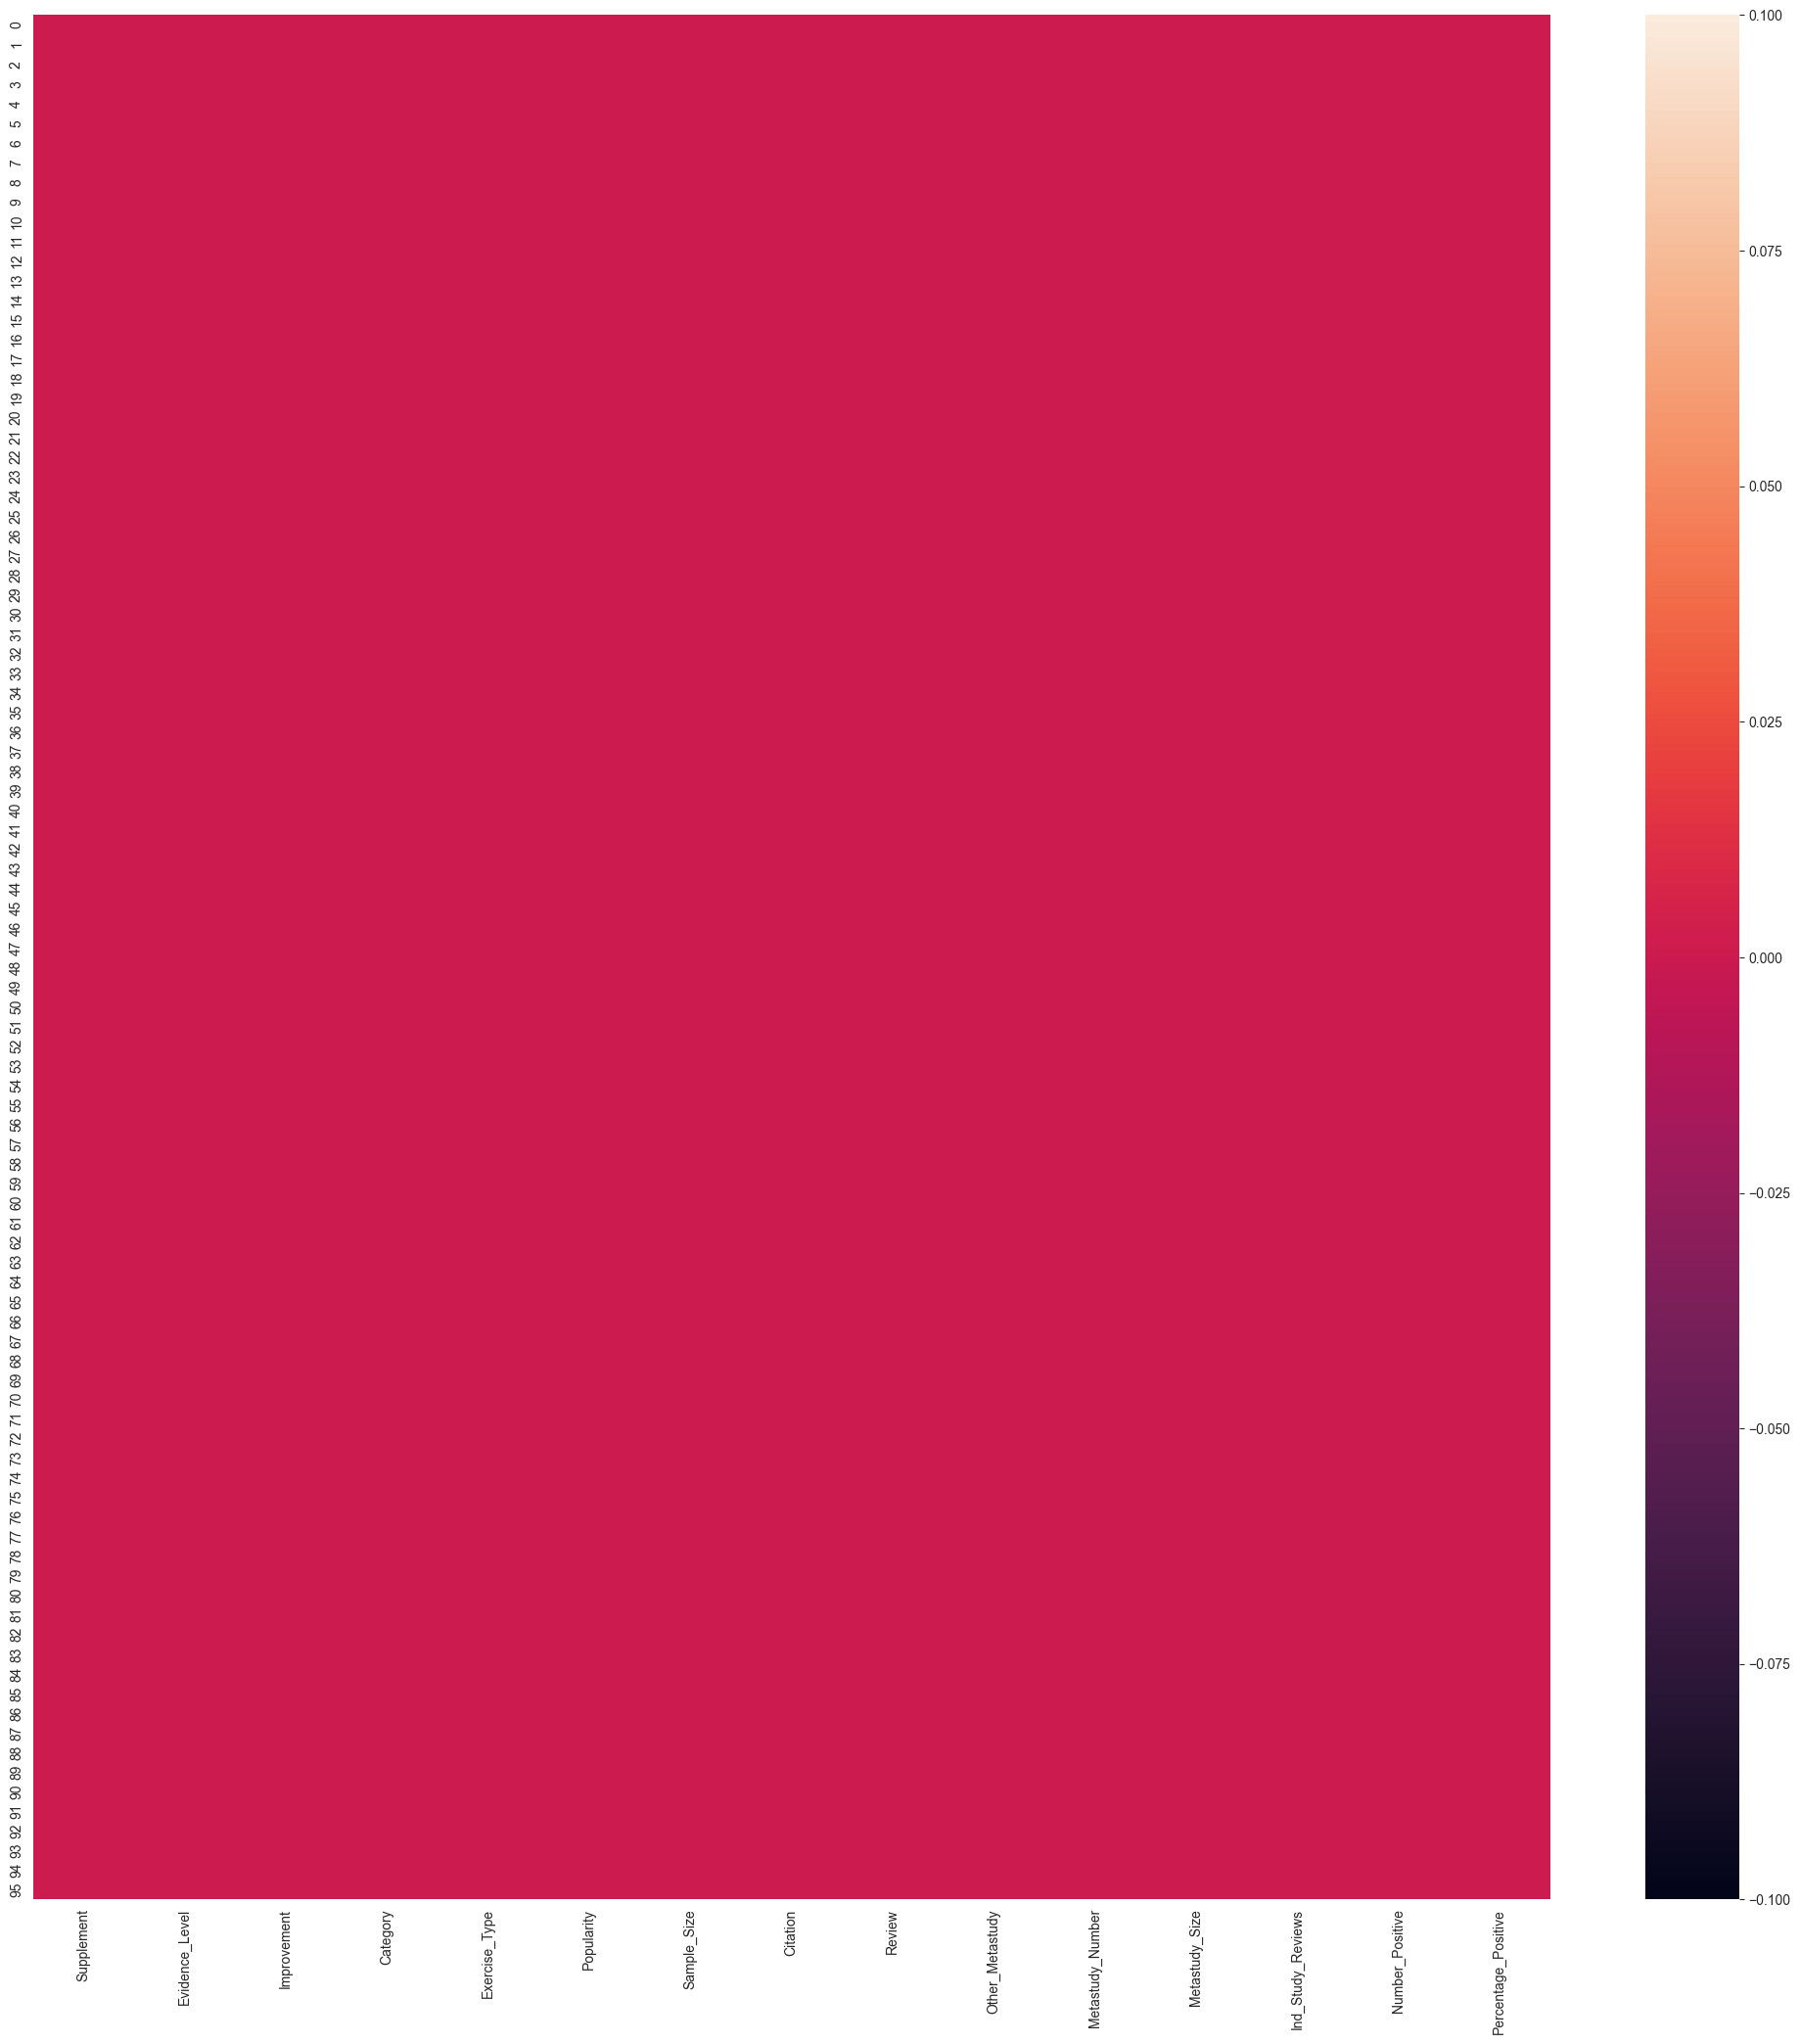

In [119]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())
plt.show()

In [120]:
df.select_dtypes(include=['int64','float64']).columns # Cheking the column names of numerical DataFrame.

Index(['Evidence_Level', 'Popularity', 'Sample_Size', 'Citation', 'Review',
       'Other_Metastudy', 'Metastudy_Number', 'Ind_Study_Reviews'],
      dtype='object')

In [121]:
num_var=['Evidence_Level', 'Popularity', 'Sample_Size', 'Citation', 'Review',
       'Other_Metastudy', 'Metastudy_Number', 'Ind_Study_Reviews']

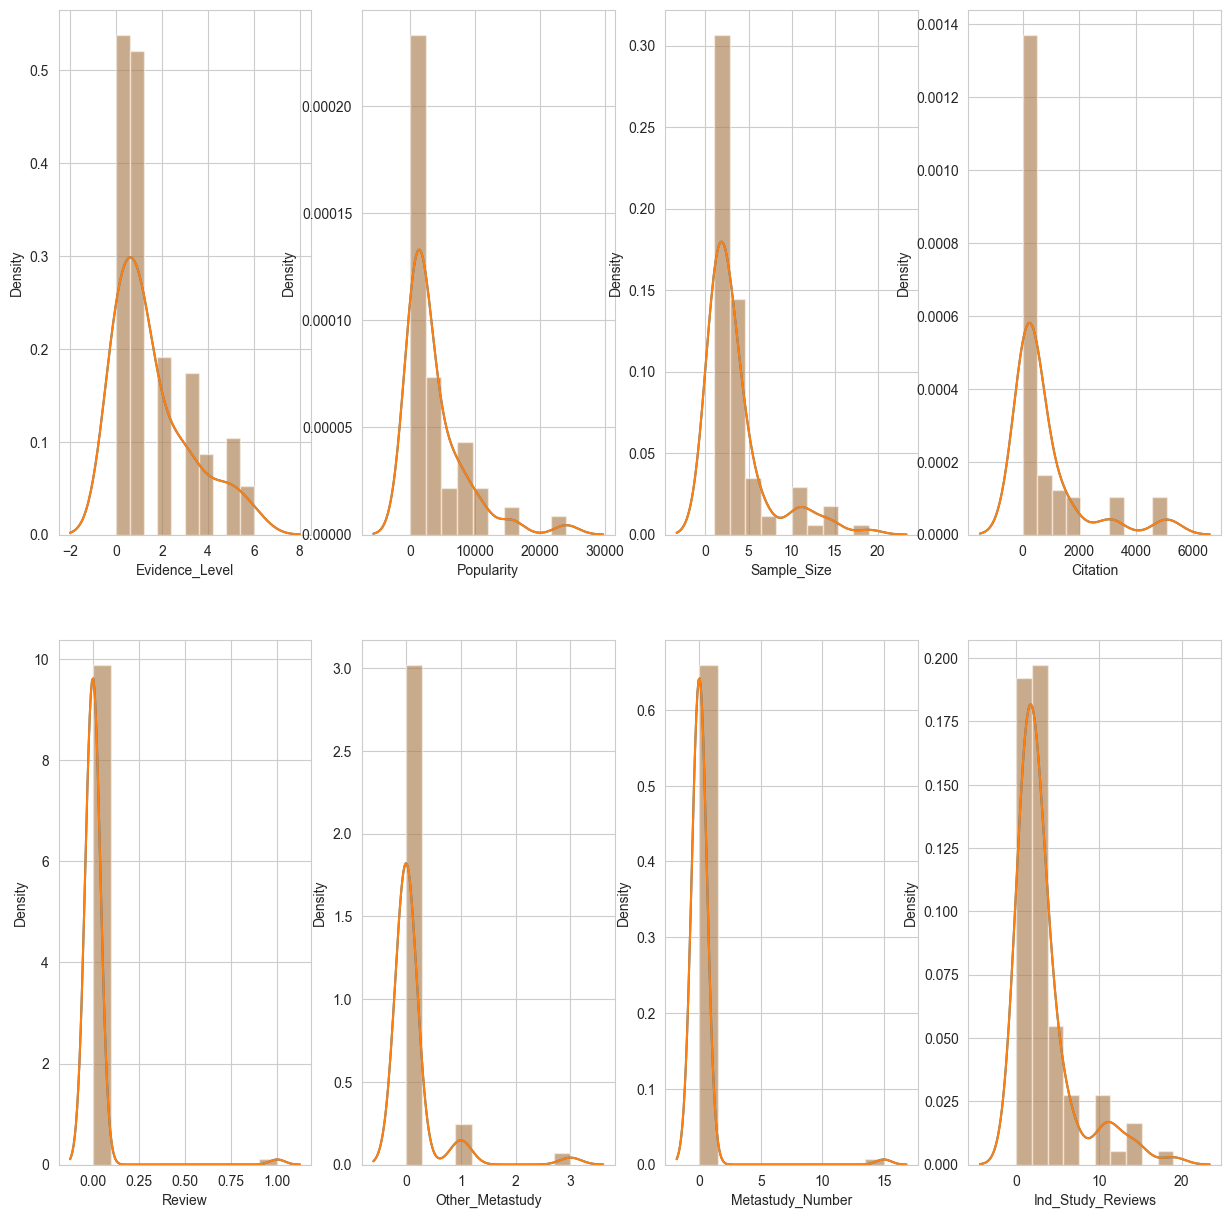

In [122]:
plt.figure(figsize=(15,15))
# Calculate the number of rows and columns for the subplots
num_rows = (len(num_var) + 3) // 4 # Adjust the number of columns as needed
num_cols = 4
for i, var in enumerate(num_var):
    plt.subplot(num_rows, num_cols, i+1)
    sns.distplot(df[var], bins=10)
    sns.distplot(df[var], bins=10)
#plt.tight_layout() # Optional: Adjusts the spacing between subplots
plt.show()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Supplement           96 non-null     object 
 1   Evidence_Level       96 non-null     float64
 2   Improvement          96 non-null     object 
 3   Category             96 non-null     object 
 4   Exercise_Type        96 non-null     object 
 5   Popularity           96 non-null     int64  
 6   Sample_Size          96 non-null     int64  
 7   Citation             96 non-null     int64  
 8   Review               96 non-null     int64  
 9   Other_Metastudy      96 non-null     int64  
 10  Metastudy_Number     96 non-null     int64  
 11  Metastudy_Size       96 non-null     object 
 12  Ind_Study_Reviews    96 non-null     int64  
 13  Number_Positive      96 non-null     object 
 14  Percentage_Positive  96 non-null     object 
dtypes: float64(1), int64(7), object(7)
memory 

In [124]:
df.head()

,Supplement,Evidence_Level,Improvement,Category,Exercise_Type,Popularity,Sample_Size,Citation,Review,Other_Metastudy,Metastudy_Number,Metastudy_Size,Ind_Study_Reviews,Number_Positive,Percentage_Positive
0,AAKG,1.00,P,S,a,242,1,20,0,0,0,0,1,1,100.00
1,AAKG,0.00,B,PE,a,242,1,20,0,0,0,0,1,0,0.00
2,Baking soda,5.00,P,P,eagfd,947,14,140,0,0,0,0,14,9,64.29
3,BCAAs,4.00,P,E,ab,5490,3,660,0,0,0,0,3,3,100.00
4,BCAAs,3.00,P,ES,ad,5490,4,660,0,0,0,0,4,2,50.00


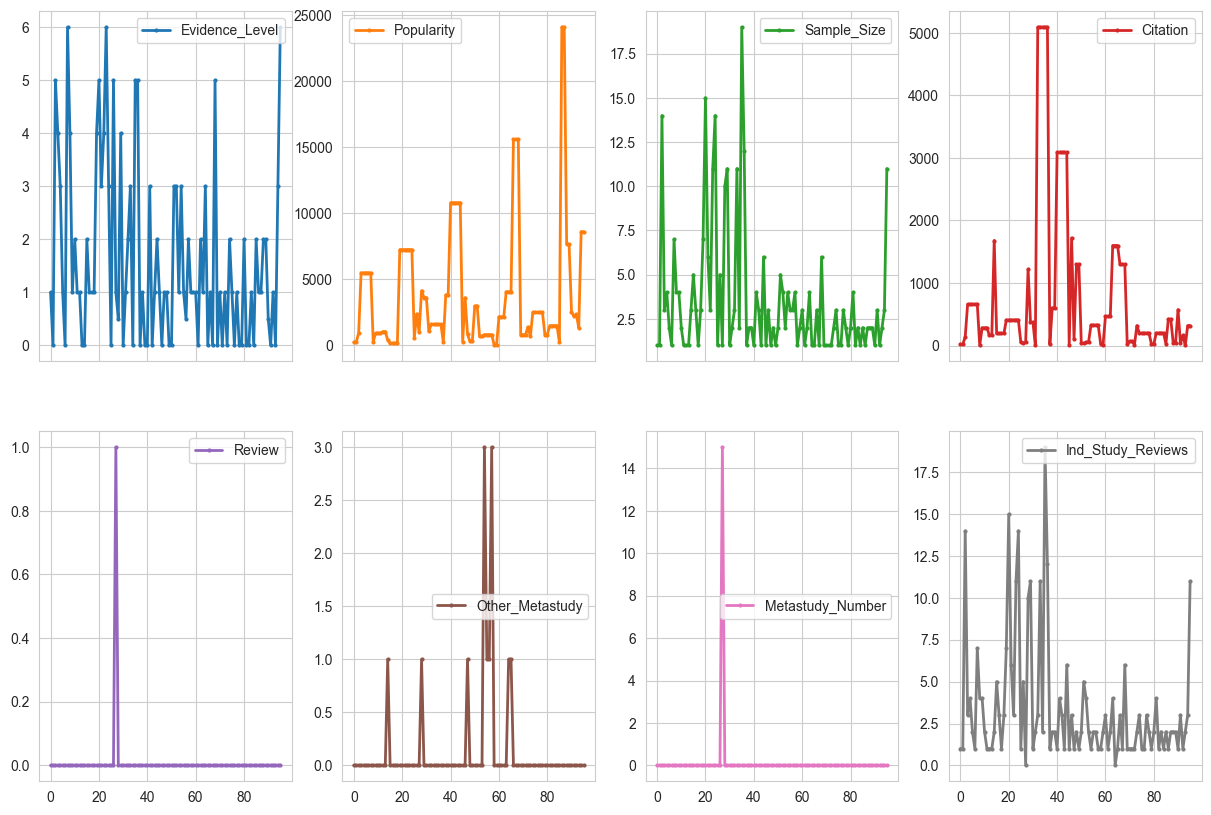

In [125]:
df.plot(lw=2,
          marker=".",
          subplots=True,
          layout=(-1, 4),
          figsize=(15, 10),
          markersize=4);

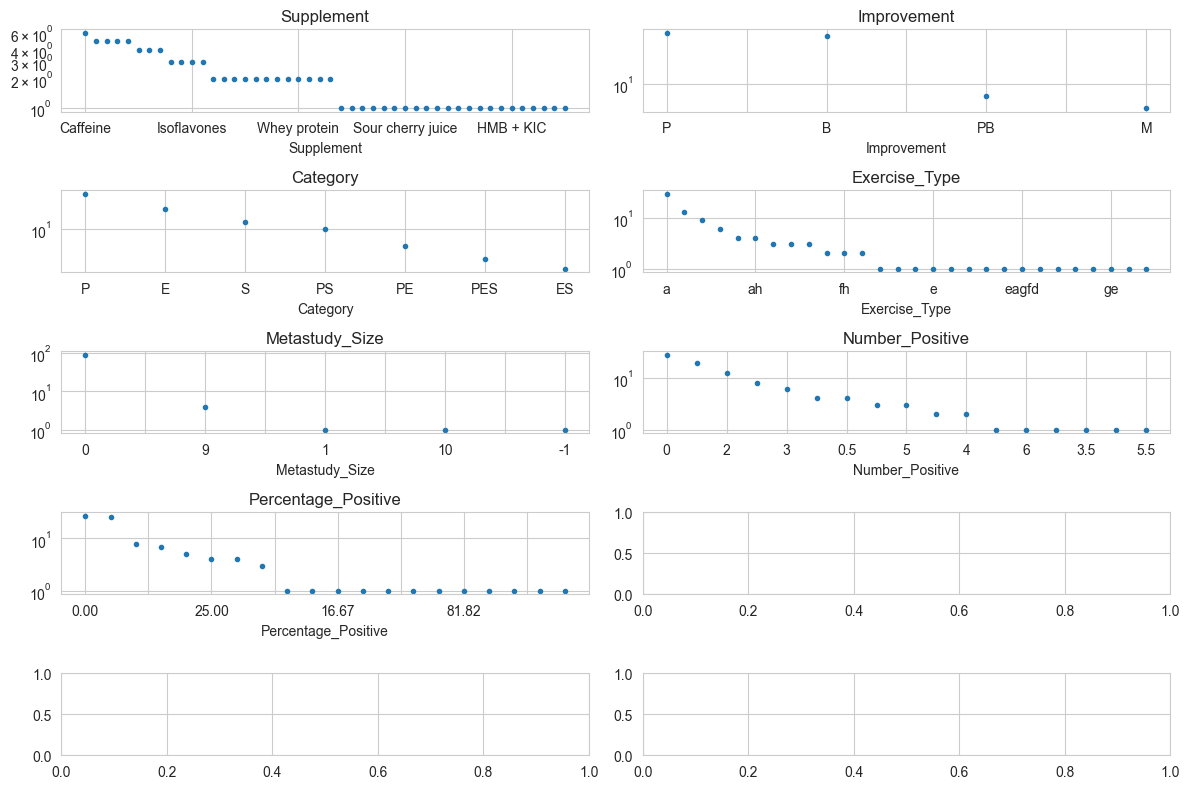

In [126]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

In [127]:
df.Improvement.unique()

array(['P', 'B', 'M', 'PB'], dtype=object)

In [128]:
df['performance_enhancement']= df.Improvement.str.count('P')
df['body']= df.Improvement.str.count('B')
df['mental']= df.Improvement.str.count('M')

##############Alternative Solution
#Improvement_encoded=pd.get_dummies(df.Improvement, dtype=float)
#df=df.join(Improvement_encoded)

In [129]:
df['performance']= df.Category.str.count('P')
df['strength']= df.Category.str.count('S')
df['endurance']= df.Category.str.count('E')

In [130]:
df.columns

Index(['Supplement', 'Evidence_Level', 'Improvement', 'Category',
       'Exercise_Type', 'Popularity', 'Sample_Size', 'Citation', 'Review',
       'Other_Metastudy', 'Metastudy_Number', 'Metastudy_Size',
       'Ind_Study_Reviews', 'Number_Positive', 'Percentage_Positive',
       'performance_enhancement', 'body', 'mental', 'performance', 'strength',
       'endurance'],
      dtype='object')

cycling	1
circuit training	2
football	3
other	4
rowing	5
running	6
swimming	7
weight training	8
football	9


In [131]:
df['cycling']= df['Exercise_Type'].str.count('a') 
df['circuit_training']= df['Exercise_Type'].str.count('b') 
df['football']= df['Exercise_Type'].str.count('c') 
df['other']= df['Exercise_Type'].str.count('d') 
df['rowing']= df['Exercise_Type'].str.count('e') 
df['running']= df['Exercise_Type'].str.count('f') 
df['swimming']= df['Exercise_Type'].str.count('g') 
df['weight_training']= df['Exercise_Type'].str.count('h') 

In [135]:
studydate=pd.DataFrame(df0["main study source"].str.split("(").str[1].str.rstrip(")"))
studydate=studydate.rename(columns={"main study source":"study_date"})
df = df.join(studydate)

In [149]:
df.study_date = df.study_date.str.strip('ab) ')
df.study_date.unique()
df.study_date = pd.to_datetime(df.study_date)

In [150]:
df.sample(10)

,Supplement,Evidence_Level,Improvement,Category,Exercise_Type,Popularity,Sample_Size,Citation,Review,Other_Metastudy,Metastudy_Number,Metastudy_Size,Ind_Study_Reviews,Number_Positive,Percentage_Positive,performance_enhancement,body,mental,performance,strength,endurance,cycling,circuit_training,football,other,rowing,running,swimming,weight_training,study_date
87,Soy protein,1.00,B,P,a,24100,2,424,0,0,0,0,2,1,50.00,0,1,0,1,0,0,1,0,0,0,0,0,0,0,2010-01-01
81,Ribose,0.00,P,P,ad,1490,4,201,0,0,0,0,4,0,0.00,1,0,0,1,0,0,1,0,0,1,0,0,0,0,2006-01-01
79,Rhodiola Rosea L.,0.00,P,E,d,810,1,26,0,0,0,0,1,0,0.00,1,0,0,0,0,1,0,0,0,1,0,0,0,0,2010-01-01
25,Calcium pyruvate,0.00,B,PS,d,571,1,52,0,0,0,0,1,0,0.00,0,1,0,1,1,0,0,0,0,1,0,0,0,0,2005-01-01
84,Ribose,0.00,B,P,a,1490,1,201,0,0,0,0,1,0,0.00,0,1,0,1,0,0,1,0,0,0,0,0,0,0,2002-01-01
47,Glycerol,1.00,P,E,d,851,1,99,0,1,0,-1,1,-1,-1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,2007-01-01
18,Bovine colostrum,1.00,P,PS,had,165,3,194,0,0,0,0,3,2,66.67,1,0,0,1,1,0,1,0,0,1,0,0,0,1,2005-01-01
2,Baking soda,5.00,P,P,eagfd,947,14,140,0,0,0,0,14,9,64.29,1,0,0,1,0,0,1,0,0,1,1,1,1,0,2010-01-01
19,Caffeine,4.00,P,E,ad,7250,7,409,0,0,0,0,7,5,71.43,1,0,0,0,0,1,1,0,0,1,0,0,0,0,2008-01-01
29,CLA,4.00,B,P,d,3620,11,374,0,0,0,0,11,6,54.55,0,1,0,1,0,0,0,0,0,1,0,0,0,0,2007-01-01


In [151]:
df.drop(['Improvement', 'Category', 'Exercise_Type'], axis=1, inplace=True)

In [152]:
df.select_dtypes("number").corr()

,Evidence_Level,Popularity,Sample_Size,Citation,Review,Other_Metastudy,Metastudy_Number,Ind_Study_Reviews,performance_enhancement,body,mental,performance,strength,endurance,cycling,circuit_training,football,other,rowing,running,swimming,weight_training
Evidence_Level,1.00,0.18,0.72,0.14,-0.04,0.01,-0.04,0.71,-0.10,0.04,0.17,0.06,-0.05,-0.12,0.12,0.30,-0.01,0.10,0.09,0.11,0.17,0.33
Popularity,0.18,1.00,0.10,0.18,-0.06,-0.13,-0.06,0.11,-0.08,0.01,0.07,0.04,-0.11,-0.01,0.19,0.02,0.16,-0.13,-0.16,-0.10,0.01,0.03
Sample_Size,0.72,0.10,1.00,0.33,-0.07,0.01,-0.07,0.99,0.04,0.03,0.07,0.08,-0.02,-0.08,0.09,0.18,0.02,0.14,0.19,0.22,0.18,0.41
Citation,0.14,0.18,0.33,1.00,-0.06,-0.02,-0.06,0.34,0.02,0.07,-0.09,-0.05,0.04,-0.10,0.02,0.20,0.16,0.07,0.25,-0.08,0.01,0.13
Review,-0.04,-0.06,-0.07,-0.06,1.00,-0.03,1.00,-0.09,-0.11,0.10,-0.02,0.08,-0.07,-0.07,-0.12,-0.02,-0.02,0.15,-0.03,-0.06,-0.03,-0.06
Other_Metastudy,0.01,-0.13,0.01,-0.02,-0.03,1.00,-0.03,-0.11,0.05,-0.02,-0.06,-0.09,0.10,-0.06,-0.07,-0.05,-0.06,0.13,-0.09,-0.12,-0.07,0.10
Metastudy_Number,-0.04,-0.06,-0.07,-0.06,1.00,-0.03,1.00,-0.09,-0.11,0.10,-0.02,0.08,-0.07,-0.07,-0.12,-0.02,-0.02,0.15,-0.03,-0.06,-0.03,-0.06
Ind_Study_Reviews,0.71,0.11,0.99,0.34,-0.09,-0.11,-0.09,1.00,0.04,0.02,0.08,0.09,-0.03,-0.07,0.10,0.18,0.02,0.11,0.20,0.23,0.19,0.39
performance_enhancement,-0.10,-0.08,0.04,0.02,-0.11,0.05,-0.11,0.04,1.00,-0.75,-0.25,-0.53,0.19,0.53,0.12,0.05,-0.01,0.02,0.12,0.01,-0.10,-0.03
body,0.04,0.01,0.03,0.07,0.10,-0.02,0.10,0.02,-0.75,1.00,-0.23,0.48,0.06,-0.38,-0.17,-0.06,-0.10,-0.10,-0.06,-0.13,0.09,0.21


<Axes: >

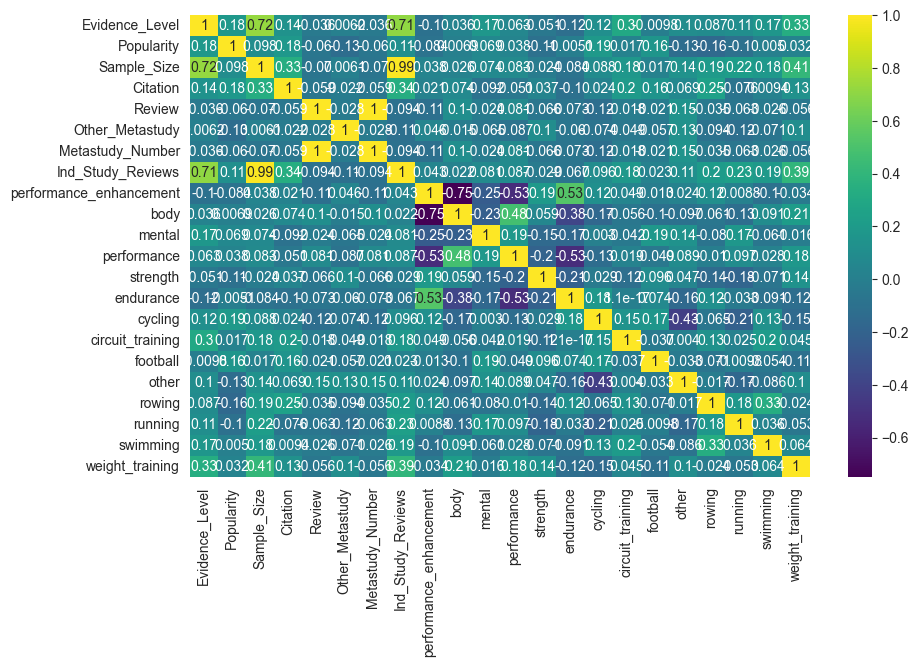

In [153]:
sns.heatmap(df.select_dtypes("number").corr(), annot = True, cmap="viridis")

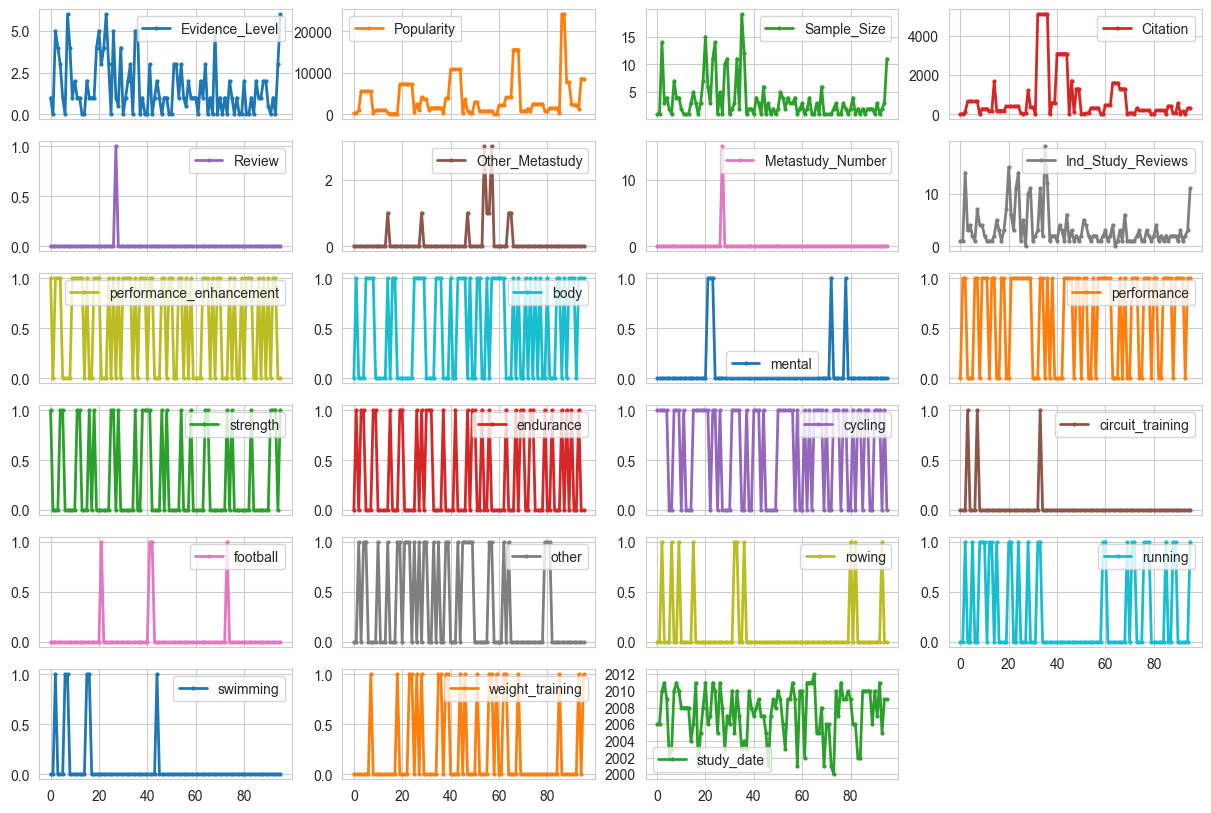

In [154]:
df.plot(lw=2,
          marker=".",
          subplots=True,
          layout=(-1, 4),
          figsize=(15, 10),
          markersize=4);

In [155]:
df.columns

Index(['Supplement', 'Evidence_Level', 'Popularity', 'Sample_Size', 'Citation',
       'Review', 'Other_Metastudy', 'Metastudy_Number', 'Metastudy_Size',
       'Ind_Study_Reviews', 'Number_Positive', 'Percentage_Positive',
       'performance_enhancement', 'body', 'mental', 'performance', 'strength',
       'endurance', 'cycling', 'circuit_training', 'football', 'other',
       'rowing', 'running', 'swimming', 'weight_training', 'study_date'],
      dtype='object')

In [156]:
df.groupby('Supplement')['Popularity'].value_counts(dropna=False)
df.groupby('performance')['Supplement'].value_counts(dropna=False)
df.groupby('Percentage_Positive')['Supplement'].value_counts(dropna=False).sort_values()


Percentage_Positive  Supplement        
100.00               Forskolin             1
50.00                Caffeine              1
                     Cordyceps sinensis    1
                     Quercetin             1
45.45                Creatine              1
                                          ..
0.00                 Quercetin             2
-1                   L-arginine            2
100.00               BCAAs                 3
0.00                 Ribose                3
-1                   HMB                   4
Name: count, Length: 83, dtype: int64

In [158]:
df.to_csv('supplements_eda.csv')

In [159]:
df.columns

Index(['Supplement', 'Evidence_Level', 'Popularity', 'Sample_Size', 'Citation',
       'Review', 'Other_Metastudy', 'Metastudy_Number', 'Metastudy_Size',
       'Ind_Study_Reviews', 'Number_Positive', 'Percentage_Positive',
       'performance_enhancement', 'body', 'mental', 'performance', 'strength',
       'endurance', 'cycling', 'circuit_training', 'football', 'other',
       'rowing', 'running', 'swimming', 'weight_training', 'study_date'],
      dtype='object')